<a href="https://colab.research.google.com/github/sm160388/hotel-booking-analysis/blob/main/Copy_of_Copy_of_Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

#**Data Collection**

In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import datetime
from time import strftime
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
import seaborn as sns                       #visualisation
import plotly.express as px
import folium
sns.set(color_codes=True)                   #default colours are used

Mount the data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

**Let** **us read our data first**

In [ ]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
data.shape

(119390, 32)

In [ ]:
#List of columns
list(data.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
#To rename the column names
data.rename(columns={'hotel':'Hotel','is_canceled':'Cancelled','lead_time':'Lead time','arrival_date_year':'Arrival date year','arrival_date_month':'Arrival date month','arrival_date_week_number':'Arrival date week number','arrival_date_day_of_month':'Arrival date day of month','stays_in_weekend_nights':'Stays in weekend nights','stays_in_week_nights':'Stays in week nights','adults':'Adults','children':'Children','babies':'Babies','meal':'Meal','country':'Country','market_segment':'Market segment','distribution_channel':'Distribution channel','is_repeated_guest':'Repeated guest','previous_cancellation':'Previous cancellation','previous_bookings_not_cancelled':'Previous bookings not cancelled','reserved_room_type':'Reserved room type','assigned_room_type':'Assigned room type','booking_changes':'Booking changes','deposit_typ':'Deposit type','agent':'Agent','company':'Company','days_in_waiting_list':'Days in waiting list','customer_type':'Customer type','adr':'Average daily rate','required_car_parking_spaces':'Required car parking spaces','total_of_special_requests':'Total of special requests','reservation_status':'Reservation status','reservation_status_date':'Reservation status date'},inplace=True)

In [ ]:
data

,Hotel,Cancelled,Lead time,Arrival date year,Arrival date month,Arrival date week number,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,...,deposit_type,Agent,Company,Days in waiting list,Customer type,Average daily rate,Required car parking spaces,Total of special requests,Reservation status,Reservation status date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
data.dtypes

Hotel                              object
Cancelled                           int64
Lead time                           int64
Arrival date year                   int64
Arrival date month                 object
Arrival date week number            int64
Arrival date day of month           int64
Stays in weekend nights             int64
Stays in week nights                int64
Adults                              int64
Children                          float64
Babies                              int64
Meal                               object
Country                            object
Market segment                     object
Distribution channel               object
Repeated guest                      int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
Reserved room type                 object
Assigned room type                 object
Booking changes                     int64
deposit_type                       object
Agent                             

In [ ]:
#Changing dtype to its correct dtype
data['Children']=data['Children'].astype(int)

**Number of bookings for various type of Hotels**

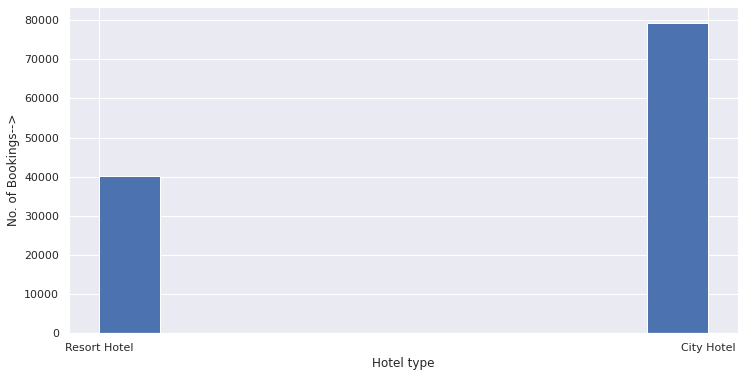

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
ax.hist(data['Hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('No. of Bookings-->')
plt.show()

here, we see that the resort hotels have around 40,000 of bookings & the city hotels around 80,000 of bookings in the data set initially.

#**Data Cleaning and** **Preparation**

In [ ]:
# Dropping unnecessary columns:
data=data.drop(columns=['Arrival date week number','Company','Agent','Reservation status date'])
data.shape
data.head(5)

KeyError: ignored

In [ ]:
#rows containing duplicate data
duplicate_rows_data = data[data.duplicated()]
print("Number of duplicate rows:",duplicate_rows_data.shape)

Number of duplicate rows: (0, 28)


In [ ]:
# Now, how many rows are there in each column?
data.count()

Hotel                             87123
Cancelled                         87123
Lead time                         87123
Arrival date year                 87123
Arrival date month                87123
Arrival date day of month         87123
Stays in weekend nights           87123
Stays in week nights              87123
Adults                            87123
Children                          87123
Babies                            87123
Meal                              87123
Country                           87123
Market segment                    87123
Distribution channel              87123
Repeated guest                    87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
Reserved room type                87123
Assigned room type                87123
Booking changes                   87123
deposit_type                      87123
Days in waiting list              87123
Customer type                     87123
Average daily rate                87123


we see that few rows have less number of entries as compared to the other rows. Like the 'Country' row,etc.

In [ ]:
# Let us now remove the duplicates:
#dropping the duplicates
data=data.drop_duplicates()
data.head(5)

,Hotel,Cancelled,Lead time,Arrival date year,Arrival date month,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,...,Reserved room type,Assigned room type,Booking changes,deposit_type,Days in waiting list,Customer type,Average daily rate,Required car parking spaces,Total of special requests,Reservation status
0,Resort Hotel,0,342,2015,July,1,0,0,2,0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2015,July,1,0,0,2,0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2015,July,1,0,1,1,0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2015,July,1,0,1,1,0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2015,July,1,0,2,2,0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [ ]:
#to see that how many rows are left with in each column after dropping the duplicate values:
data.count()

Hotel                             87123
Cancelled                         87123
Lead time                         87123
Arrival date year                 87123
Arrival date month                87123
Arrival date day of month         87123
Stays in weekend nights           87123
Stays in week nights              87123
Adults                            87123
Children                          87123
Babies                            87123
Meal                              87123
Country                           87123
Market segment                    87123
Distribution channel              87123
Repeated guest                    87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
Reserved room type                87123
Assigned room type                87123
Booking changes                   87123
deposit_type                      87123
Days in waiting list              87123
Customer type                     87123
Average daily rate                87123


we see that around 87,000 are still left which was previouslly around 1 lac rows. So, our dataset did have a lot of duplicate values in it.

In [ ]:
# Lets check if the dataset has any null values in it:
#finding the null values
print(data.isnull().sum())

Hotel                             0
Cancelled                         0
Lead time                         0
Arrival date year                 0
Arrival date month                0
Arrival date day of month         0
Stays in weekend nights           0
Stays in week nights              0
Adults                            0
Children                          0
Babies                            0
Meal                              0
Country                           0
Market segment                    0
Distribution channel              0
Repeated guest                    0
previous_cancellations            0
previous_bookings_not_canceled    0
Reserved room type                0
Assigned room type                0
Booking changes                   0
deposit_type                      0
Days in waiting list              0
Customer type                     0
Average daily rate                0
Required car parking spaces       0
Total of special requests         0
Reservation status          

In [ ]:
# Replace the null values with 0
#filling the null values
data=data.fillna(value=0) 
data.count()

Hotel                             87123
Cancelled                         87123
Lead time                         87123
Arrival date year                 87123
Arrival date month                87123
Arrival date day of month         87123
Stays in weekend nights           87123
Stays in week nights              87123
Adults                            87123
Children                          87123
Babies                            87123
Meal                              87123
Country                           87123
Market segment                    87123
Distribution channel              87123
Repeated guest                    87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
Reserved room type                87123
Assigned room type                87123
Booking changes                   87123
deposit_type                      87123
Days in waiting list              87123
Customer type                     87123
Average daily rate                87123


In [ ]:
# To ensure that there are no more null values:
print(data.isnull().sum())

Hotel                             0
Cancelled                         0
Lead time                         0
Arrival date year                 0
Arrival date month                0
Arrival date day of month         0
Stays in weekend nights           0
Stays in week nights              0
Adults                            0
Children                          0
Babies                            0
Meal                              0
Country                           0
Market segment                    0
Distribution channel              0
Repeated guest                    0
previous_cancellations            0
previous_bookings_not_canceled    0
Reserved room type                0
Assigned room type                0
Booking changes                   0
deposit_type                      0
Days in waiting list              0
Customer type                     0
Average daily rate                0
Required car parking spaces       0
Total of special requests         0
Reservation status          

In [ ]:
# Using Describe function to understand the various factors in various values:
data.describe()

,Cancelled,Lead time,Arrival date year,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,Babies,Repeated guest,previous_cancellations,previous_bookings_not_canceled,Booking changes,Days in waiting list,Average daily rate,Required car parking spaces,Total of special requests
count,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000,87123.000000
mean,0.272879,79.729601,2016.210541,15.815376,1.005441,2.625495,1.875842,0.138873,0.010835,0.039186,0.030233,0.184567,0.272270,0.731885,106.366713,0.084490,0.699907
std,0.445442,85.941448,0.685965,8.835234,1.031579,2.051753,0.626833,0.456239,0.113674,0.194038,0.369369,1.734574,0.727994,9.866000,55.044371,0.281934,0.832228
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


Here, we see that in Lead time, we have minimum is '0' i.e the time between the date of booking & the arrival date is minimum '0' and maximum '737' which means the maximum is around 2 years.
Likeswise in Booking changes, we have a minimum of '0' i.e '0' booking changes and the maximum of '21'. So, we have a maximum of 21 booking changes in our dataset.

***After reducing the dataset, let us again see the number of bookings for both the hotels***

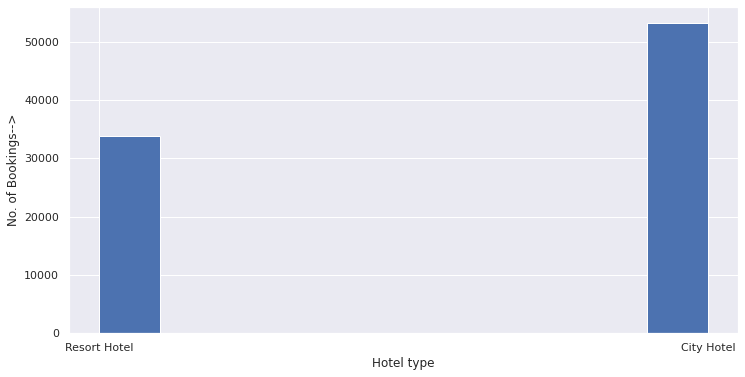

In [ ]:
fig, ax= plt.subplots(figsize=(12,6))
ax.hist(data['Hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('No. of Bookings-->')
plt.show()

Now, the resort hotel entry has reduced from 40,000 to around 33,000 and city hotel have been reduced from 80,000 to around 53,000.

# **Data** **Visualisation**

**Relation between Market segment and Days on waiting list**

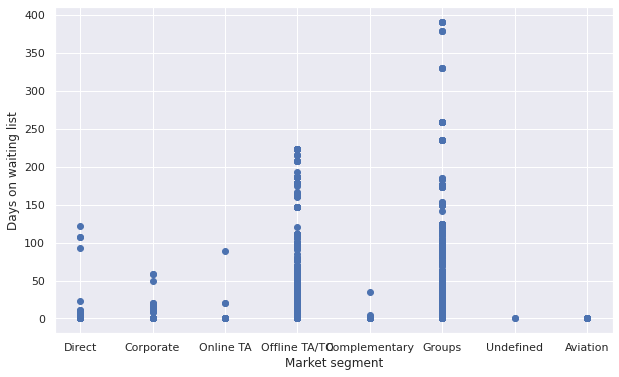

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['Market segment'], data['Days in waiting list'])
ax.set_xlabel('Market segment')
ax.set_ylabel('Days on waiting list')
plt.show()

Here, we see that Aviation industry have the minimum number of days on the waiting list. The reason for this might be that when a flight has to be land at the location, it has to provide immediate accomodation to all of its working staff like Pilots, Air hostages etc. so they do not entertain hotels which put them on a waiting list for too long. So, in general, the hotel management sees that there needs are met immediately and provide rooms to them with almost 0 days on the waiting list.

**Distribution channel and the Days on waiting list**

<function matplotlib.pyplot.show>

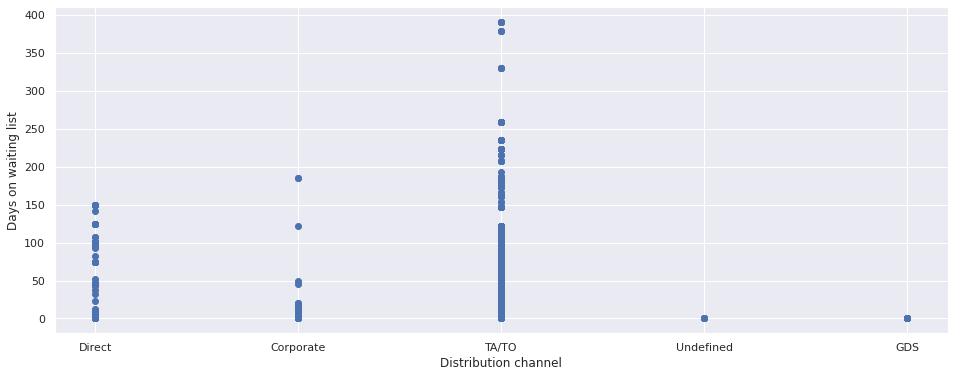

In [ ]:
fig,ax = plt.subplots(figsize=(16,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['Distribution channel'], data['Days in waiting list'])
ax.set_xlabel('Distribution channel')
ax.set_ylabel('Days on waiting list')
plt.show

We see that the 'Travel Agent' and 'Tour Operators' are the distribution channel for which the highest number of days are there on the waiting list.

**Type of hotel and the number of bookings per month**

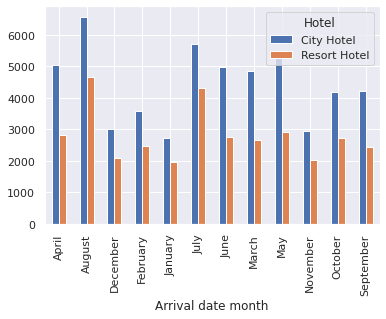

In [ ]:
data1=data.groupby(['Arrival date month','Hotel']).size()
data1=data1.unstack()
data1.plot(kind='bar')

->We see that in the month of August, July and May, the number of bookings are highest in City hotels.

->In Resort hotel as well, the highest number of bookings are in the month of August.

**Cancelation and the Hotel type**

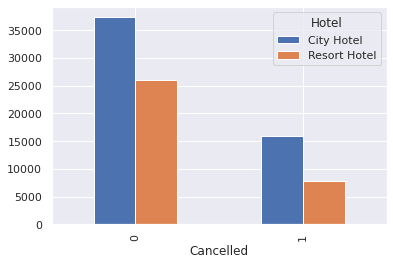

In [ ]:
data2=data.groupby(['Cancelled','Hotel']).size()
data2=data2.unstack()
data2.plot(kind='bar')

**The Cancelation type and the Repeated guest**

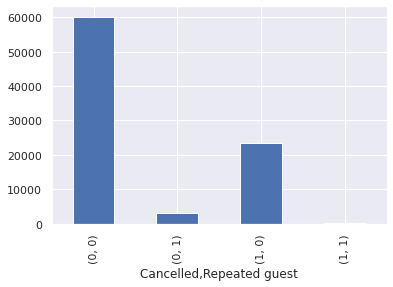

In [ ]:
data3=data.groupby(['Cancelled','Repeated guest']).size()
#data3=data3.unstack()
data3.plot(kind='bar')

Here, we are comparing two important concepts that whether the hotel booking is cancelled and whether the customer is a repeated guest or not? 

 We see that when the hotel booking is cancelled and the customer is a repeated guest, the entries are almost '0', which means that repeated guest is very less likely to cancel his booking with hotel

**Type of Hotel and the Market Segment**

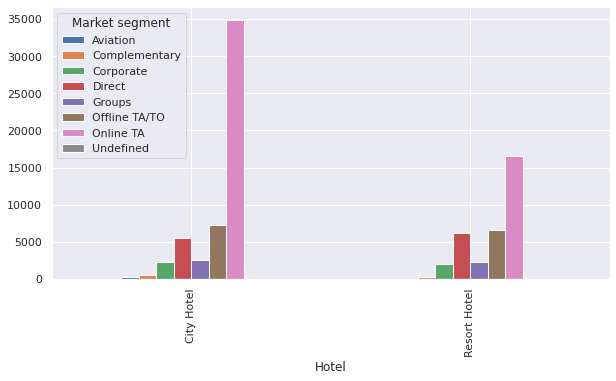

In [ ]:
#fig, ax = plt.subplots(figsize=(16,6))
data4=data.groupby(['Hotel','Market segment']).size()
data4=data4.unstack()
data4=data4.plot(kind='bar', figsize=(10,5))

Here we see that in both the hotels, the maximum number of booking are bought by 'Online Travel Agents'.

**Hotel type and the Distribution Channel**

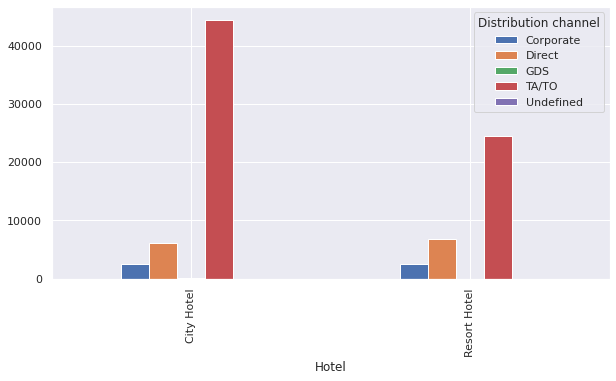

In [ ]:
data5=data.groupby(['Hotel','Distribution channel']).size()
data5=data5.unstack()
data5.plot(kind='bar',figsize=(10,5))

**Repeated guest and Customer type**

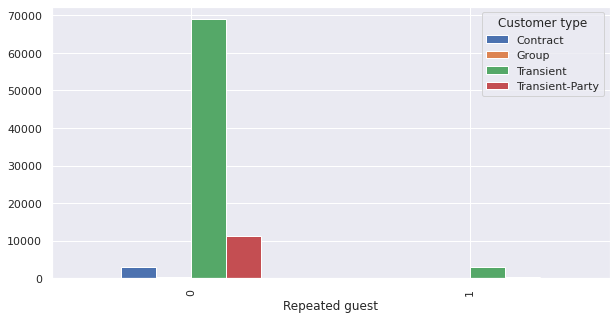

In [ ]:
data6=data.groupby(['Repeated guest','Customer type']).size()
data6=data6.unstack()
data6.plot(kind='bar',figsize=(10,5))

Here, we can see that the maximum number of repeated guest are "Transient type" i.e the "Short-time customers"

**Reservation statuas and Market segment**

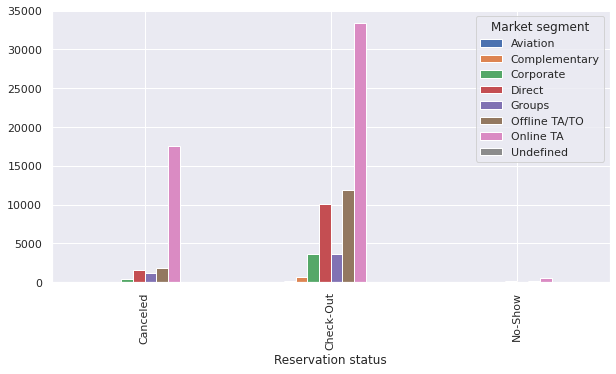

In [ ]:
data7=data.groupby(['Reservation status','Market segment']).size()
data7=data7.unstack()
data7.plot(kind='bar',figsize=(10,5))

Here, we have plotted the reservation status of the booking with respect to the market segment. We see that most of the bookings either in the cancelled status or in the checkout status are done by the 'Online Travel Agents'.

**We have now grouped the data based on month**

In [ ]:
grp=data.groupby('Arrival date month')
p=grp['Lead time'].agg(np.mean)
q=grp['Stays in week nights'].agg(np.mean)
r=grp['Stays in weekend nights'].agg(np.mean)
s=grp['Booking changes'].agg(np.sum)
t=grp['Days in waiting list'].agg(np.sum)
u=grp['Average daily rate'].agg(np.mean)
v=grp['Hotel'].agg(np.sum)
print(p)
print(q)
print(r)
print(s)
print(t)
print(u)
print(v)

Arrival date month
April         75.742447
August       102.636728
December      58.905944
February      35.076923
January       34.329201
July         111.894249
June         103.798915
March         53.278415
May           91.825559
November      47.424754
October       82.680990
September     93.789513
Name: Lead time, dtype: float64
Arrival date month
April        2.441483
August       3.020296
December     2.416308
February     2.283695
January      2.331979
July         3.003588
June         2.810926
March        2.530683
May          2.513345
November     2.477597
October      2.353877
September    2.710337
Name: Stays in week nights, dtype: float64
Arrival date month
April        1.001269
August       1.147588
December     0.894408
February     0.921598
January      0.841171
July         1.209409
June         1.043652
March        0.861660
May          0.963573
November     0.851115
October      0.963542
September    1.069111
Name: Stays in weekend nights, dtype: float64
Arriva

**Month of the year Vs Lead time**

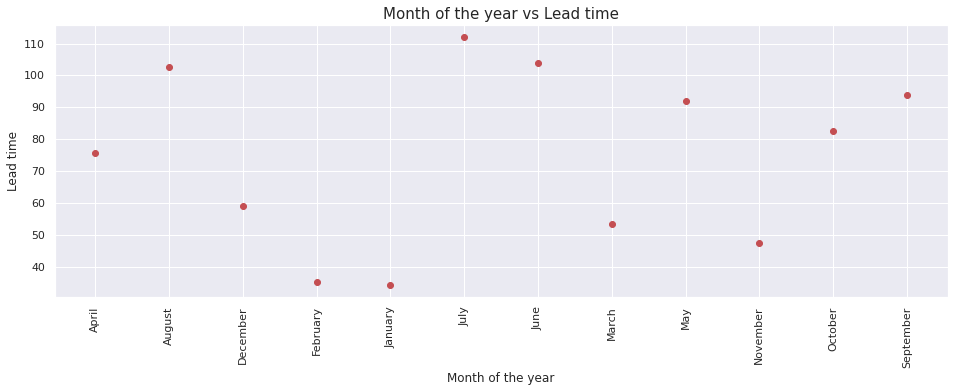

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(p,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Lead time',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Lead time')
plt.show()

Here, we are comparing the month of the year with the lead time. We see in the month of July the lead time is the highest.

**Month of the year Vs Stays on week nights**

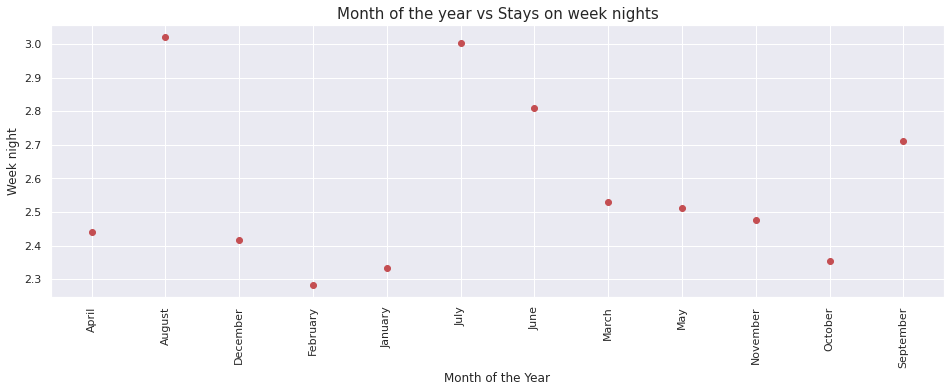

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(q,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Stays on week nights',fontsize=15)
plt.xlabel('Month of the Year')
plt.ylabel('Week night')
plt.show()

**Month of the year Vs Stays on weekend nights**

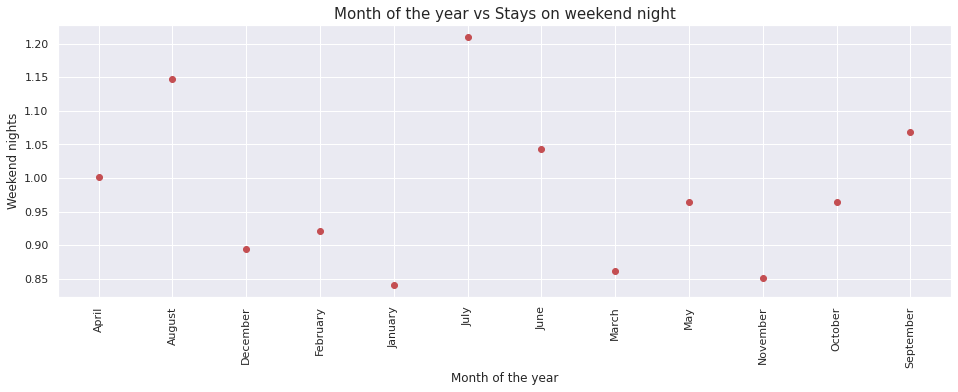

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(r,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Stays on weekend night',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Weekend nights')
plt.show()

**Month of the year Vs Booking changes**

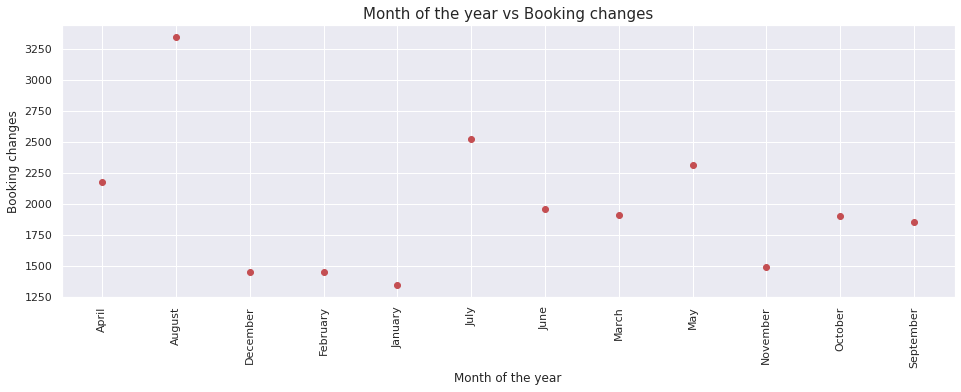

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(s,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Booking changes',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Booking changes')
plt.show()

Here, we have compared the Booking changes to the every month of the year. We see that August has the lot of booking changes and it is accompanied by July, May, June, April etc.

**Month of the year Vs Days in waiting list**

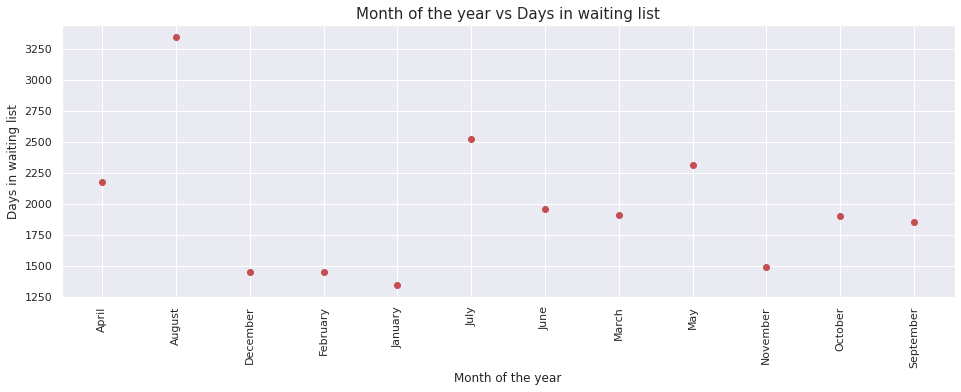

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(s,'ro',color='r')
plt.xticks(rotation=90)
plt.title('Month of the year vs Days in waiting list',fontsize=15)
plt.xlabel('Month of the year')
plt.ylabel('Days in waiting list')
plt.show()

Now, this is again a important visualisation concept. Here, we have tried to visualise the two important factors i.e 'the days in the waiting list' and 'the month of the year'. So, in general the no. of bookings are highest in the months of August and July as we have seen before. We see that in August, the no. of days in waiting list is more, which means that a customer has to wait for a longer time. This can likely be a situation for the previous month but it had been on the waiting list and then the booking was confirmed in August.

**Heatmap**

,Cancelled,Lead time,Arrival date year,Arrival date day of month,Stays in weekend nights,Stays in week nights,Adults,Children,Babies,Repeated guest,previous_cancellations,previous_bookings_not_canceled,Booking changes,Days in waiting list,Average daily rate,Required car parking spaces,Total of special requests
Cancelled,1.000000,0.182714,0.089126,0.005192,0.060566,0.083310,0.082041,0.068365,-0.020537,-0.089189,0.050873,-0.051874,-0.092700,0.001588,0.129278,-0.183586,-0.118698
Lead time,0.182714,1.000000,0.139838,0.009653,0.236123,0.311398,0.140388,0.029310,-0.003362,-0.147075,0.004636,-0.078958,0.077725,0.130107,0.024273,-0.086236,0.035315
Arrival date year,0.089126,0.139838,1.000000,-0.010167,0.005032,0.003226,0.038371,0.041138,-0.023074,0.024336,-0.053164,0.027266,0.008384,-0.027547,0.176169,-0.039990,0.063869
Arrival date day of month,0.005192,0.009653,-0.010167,1.000000,-0.017401,-0.028124,-0.001380,0.015900,-0.000420,-0.004122,-0.008440,0.000154,0.006322,0.005390,0.022246,0.009188,-0.001790
Stays in weekend nights,0.060566,0.236123,0.005032,-0.017401,1.000000,0.555134,0.088378,0.028538,0.013788,-0.107265,-0.020916,-0.056780,0.050284,-0.031269,0.039258,-0.043059,0.032211
Stays in week nights,0.083310,0.311398,0.003226,-0.028124,0.555134,1.000000,0.095682,0.030705,0.016119,-0.113780,-0.018925,-0.058653,0.085058,0.002113,0.053810,-0.044433,0.037802
Adults,0.082041,0.140388,0.038371,-0.001380,0.088378,0.095682,1.000000,0.023687,0.016625,-0.171953,-0.042186,-0.121049,-0.048114,-0.016129,0.248895,0.007789,0.112850
Children,0.068365,0.029310,0.041138,0.015900,0.028538,0.030705,0.023687,1.000000,0.017463,-0.045783,-0.019057,-0.029502,0.031234,-0.020199,0.325981,0.036208,0.044493
Babies,-0.020537,-0.003362,-0.023074,-0.000420,0.013788,0.016119,0.016625,0.017463,1.000000,-0.013005,-0.005342,-0.009211,0.081138,-0.006774,0.023511,0.030887,0.094915
Repeated guest,-0.089189,-0.147075,0.024336,-0.004122,-0.107265,-0.113780,-0.171953,-0.045783,-0.013005,1.000000,0.206558,0.441493,0.005889,-0.012667,-0.153291,0.071873,-0.001598


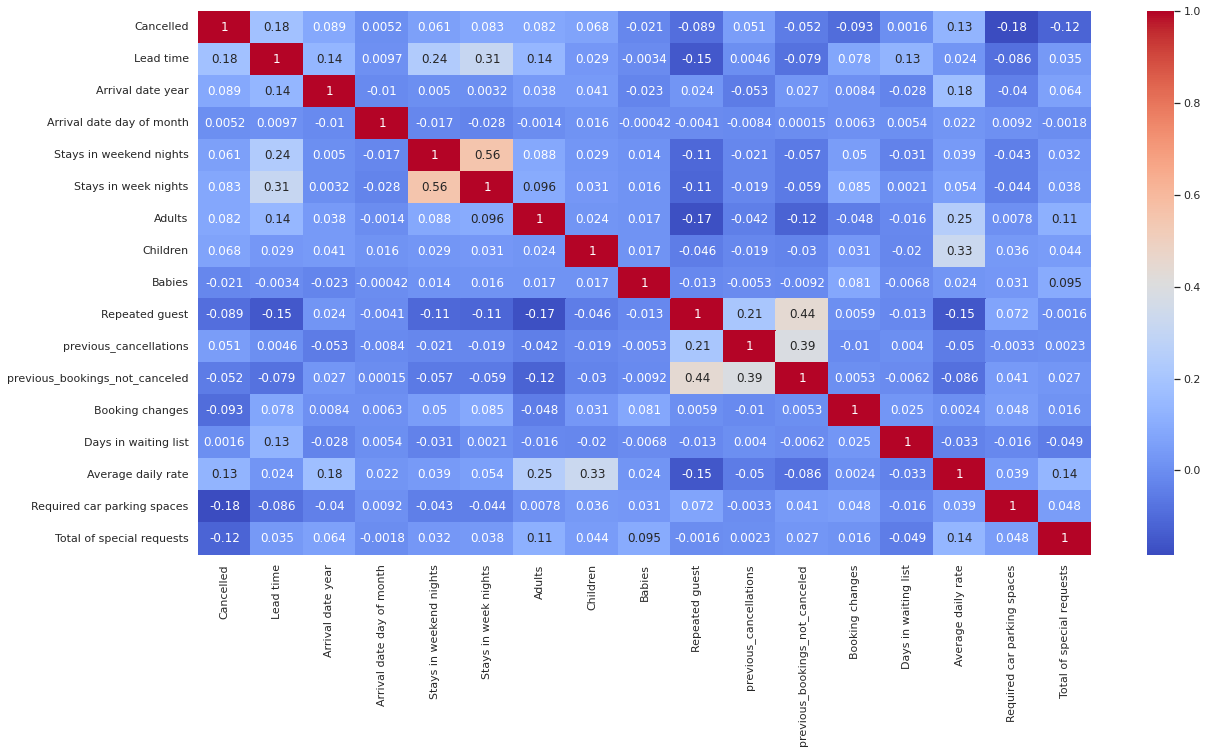

In [ ]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap="coolwarm",annot=True) #BrBG, RdGy, coolwarm
c

Now, I have tried to give a heatmap for the entire dataset i.e I have tried to give this heatmap to understand the relation between the various column in dataset.

#**Data** **Modeling**

Now, let us go to Data Modeling. we are again just checking the shape of our dataset i.e how many number of rows & columns we have? 

In [ ]:
data.shape

(87123, 28)

We are still left with 87123 rows & 28 columns. 

For data modeling, we are trying to use only those rows in the dataset which have cancelled the booking. We are not including the rows which have not cancelled in order to make the modeling easier.

In [ ]:
# Cancelations
total_cancellations = data["Cancelled"].sum()
print(total_cancellations)
resort_hotel_cancelations = data.loc[data["Hotel"] == "Resort Hotel"]["Cancelled"].sum()
print(resort_hotel_cancelations)
city_hotel_cancelations = data.loc[data["Hotel"] == "City Hotel"]["Cancelled"].sum()
print(city_hotel_cancelations)

23774
7891
15883


We see that the total number of cancelations are 23000 among 87000. Around 1/3rd of them have cancelled their booking.



In [ ]:
#as percent:
rel_cancel = total_cancellations / data.shape[0] * 100
rh_rel_cancel = resort_hotel_cancelations / data.loc[data["Hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = city_hotel_cancelations / data.loc[data["Hotel"] == "City Hotel"].shape[0] * 100

print(f"Total booking canceled: {total_cancellations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_hotel_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel booking canceled: {city_hotel_cancelations:,} ({ch_rel_cancel:.0f} %)")

We are trying to calculate this in percentage(%) i.e the total % of booking canceled was around 23000 i.e around **27%**. 

In resort hotel, this is around **24%**  and in city hotel, this is around **30%**

**Create a DataFrame with the relevant data**


We are trying to create a DataFrame with relevant data. Here, we have created

In [ ]:
res_book_per_month = data.loc[(data["Hotel"] == "Resort Hotel")].groupby("Arrival date month")["Hotel"].count()
res_cancel_per_month = data.loc[(data["Hotel"] == "Resort Hotel")].groupby("Arrival date month")["Cancelled"].sum()

city_book_per_month = data.loc[(data["Hotel"] == "City Hotel")].groupby("Arrival date month")["Hotel"].count()
city_cancel_per_month = data.loc[(data["Hotel"] == "City Hotel")].groupby("Arrival date month")["Cancelled"].sum()

res_cancel_data= pd.DataFrame({"Hotel": "Resort Hotel","Month": list(res_book_per_month.index),
                               "Bookings": list(res_book_per_month.values),
                               "Cancelations": list(res_cancel_per_month.values)})
city_cancel_data= pd.DataFrame({"Hotel": "City Hotel",
                               "Month": list(city_book_per_month.index),
                               "Bookings": list(city_book_per_month.values),
                               "Cancelations": list(city_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, city_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

#order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories= ordered_months, ordered=True)

#show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y= "cancel_percent", hue= "Hotel",
            hue_order= ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()
  

In [ ]:
cancel_corr = data.corr()["Cancelled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

We see that Lead time,Required car parking spaces,Average daily rate, the Total of special requests and Booking changes are the most important factors for cancellation of booking.

In [ ]:
data.groupby("Cancelled")["Reservation status"].value_counts()

In [ ]:
lead_cancel_data = data.groupby("Lead time")["Cancelled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >=10]
plt.figure(figsize=(12,8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values *100)
plt.title("Effect of lead time on cancellation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancellation [%]", fontsize=16)
#plt.xlin(0,365)
plt.show()